In [1]:
 pip install tensorflow==2.2.0

     |████████████████████████████████| 516.3 MB 5.9 kB/s  eta 0:00:011
     |████████████████████████████████| 454 kB 78.1 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 68.1 MB/s eta 0:00:01
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.4.4
    Uninstalling tensorflow-2.4.4:
      Successfully uninstalled tensorflow-2.4.4
Note: you may need to restart the kernel to use updated packages.


In [2]:
  pip install keras==2.2.5

     |████████████████████████████████| 336 kB 28.0 MB/s eta 0:00:01
     |████████████████████████████████| 50 kB 17.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_39015f7cbe0c4760900af6d9649f8c3b = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Xj8fhZA5dSZuQYL1yxcDK5LtU1MhDXHacSH654OFut_K',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')




In [3]:
body = client_39015f7cbe0c4760900af6d9649f8c3b.get_object(Bucket='new-donotdelete-pr-hv21clbef0djyz',Key='Crude Oil Prices Daily.xlsx')['Body']

data = pd.read_excel(body.read())
data.head()

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87


In [4]:
data.tail()

,Date,Closing Value
8218,2018-07-03,74.19
8219,2018-07-04,NaN
8220,2018-07-05,73.05
8221,2018-07-06,73.78
8222,2018-07-09,73.93


In [5]:
data.describe()

,Closing Value
count,8216.000000
mean,43.492139
std,29.616804
min,10.250000
25%,19.577500
50%,29.610000
75%,63.402500
max,145.310000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8223 entries, 0 to 8222
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8223 non-null   datetime64[ns]
 1   Closing Value  8216 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 128.6 KB


In [7]:
data.isnull().any()

Date             False
Closing Value     True
dtype: bool

In [8]:
data.isnull().sum()

Date             0
Closing Value    7
dtype: int64

In [9]:
data.dropna(axis=0,inplace=True)

In [10]:
data.isnull().sum()

Date             0
Closing Value    0
dtype: int64

In [11]:
data.shape

(8216, 2)

In [12]:
import tensorflow as tf

In [13]:
tf.__version__

'2.2.0'

In [14]:
import tensorflow.keras

In [15]:
tensorflow.keras.__version__

'2.3.0-tf'

In [16]:
data_oil=data.reset_index()['Closing Value']

In [17]:
data_oil

0       25.56
1       26.00
2       26.53
3       25.85
4       25.87
        ...  
8211    73.89
8212    74.19
8213    73.05
8214    73.78
8215    73.93
Name: Closing Value, Length: 8216, dtype: float64

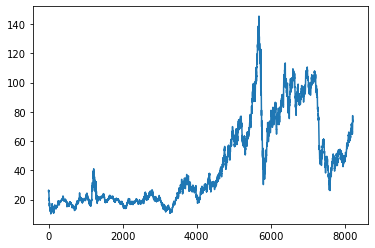

In [18]:
plt.plot(data_oil)

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_oil=scaler.fit_transform(np.array(data_oil).reshape(-1,1))

In [20]:
print(data_oil)

[[0.11335703]
 [0.11661484]
 [0.12053902]
 ...
 [0.46497853]
 [0.47038353]
 [0.47149415]]


In [21]:
training_size=int(len(data_oil)*0.65)
test_size=len(data_oil)-training_size
train_data,test_data=data_oil[0:training_size,:],data_oil[training_size:len(data_oil),:1]

In [22]:
training_size,test_size

(5340, 2876)

In [23]:
train_data

array([[0.11335703],
       [0.11661484],
       [0.12053902],
       ...,
       [0.37916482],
       [0.38153413],
       [0.38294092]])

In [24]:
train_data.shape

(5340, 1)

In [25]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [26]:
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [27]:
print(X_train.shape), print(y_train.shape)

(5329, 10)
(5329,)


(None, None)

In [28]:
print(X_test.shape), print(ytest.shape)

(2865, 10)
(2865,)


(None, None)

In [29]:
X_train

array([[0.11335703, 0.11661484, 0.12053902, ..., 0.10980305, 0.1089886 ,
        0.11054346],
       [0.11661484, 0.12053902, 0.11550422, ..., 0.1089886 , 0.11054346,
        0.10165852],
       [0.12053902, 0.11550422, 0.1156523 , ..., 0.11054346, 0.10165852,
        0.09906708],
       ...,
       [0.36731823, 0.35176958, 0.36080261, ..., 0.36391234, 0.37042796,
        0.37042796],
       [0.35176958, 0.36080261, 0.35354657, ..., 0.37042796, 0.37042796,
        0.37879461],
       [0.36080261, 0.35354657, 0.35295424, ..., 0.37042796, 0.37879461,
        0.37916482]])

In [30]:
y_train

array([0.10165852, 0.09906708, 0.08203761, ..., 0.37879461, 0.37916482,
       0.38153413])

In [31]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [32]:

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential, load_model

In [35]:
model=Sequential()

In [36]:
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))

In [37]:

model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 10, 50)            10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 10, 50)            20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
84/84 [==============================] - 4s 44ms/step - loss: 0.0021 - val_loss: 0.0011
Epoch 2/50
84/84 [==============================] - 3s 30ms/step - loss: 1.3410e-04 - val_loss: 7.6679e-04
Epoch 3/50
84/84 [==============================] - 3s 30ms/step - loss: 1.2631e-04 - val_loss: 8.6284e-04
Epoch 4/50
84/84 [==============================] - 3s 30ms/step - loss: 1.2307e-04 - val_loss: 7.8658e-04
Epoch 5/50
84/84 [==============================] - 3s 37ms/step - loss: 1.2777e-04 - val_loss: 9.0616e-04
Epoch 6/50
84/84 [==============================] - 3s 33ms/step - loss: 1.2090e-04 - val_loss: 0.0013
Epoch 7/50
84/84 [==============================] - 3s 31ms/step - loss: 1.2011e-04 - val_loss: 9.9539e-04
Epoch 8/50
84/84 [==============================] - 3s 32ms/step - loss: 1.2131e-04 - val_loss: 9.1706e-04
Epoch 9/50
84/84 [==============================] - 3s 30ms/step - loss: 1.2287e-04 - val_loss: 8.2048e-04
Epoch 10/50
84/84 [==============================

In [40]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [41]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [42]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

29.184374857080986

In [43]:
math.sqrt(mean_squared_error(ytest,test_predict))

78.58320750658562

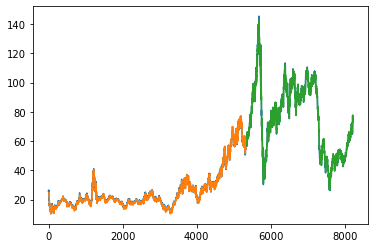

In [44]:
look_back=10
trainPredictPlot = np.empty_like(data_oil)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data_oil)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data_oil)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data_oil))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [45]:
model.save("crude_oil.h5")

In [46]:
# !tar -zcvf crude_oil.h5 Crude_Oil.tgz

In [47]:
!tar -zcvf crude_oil.tgz crude_oil.h5

crude_oil.h5


In [48]:
ls -1

crude_oil.h5
crude_oil.tgz


In [49]:
len(test_data)

2876

In [50]:
x_input=test_data[2866:].reshape(1,-1)
x_input.shape

(1, 10)

In [51]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [52]:
temp_input

[0.44172960165852215,
 0.48111950244335855,
 0.49726047682511476,
 0.4679401747371539,
 0.4729749740855915,
 0.47119798608026064,
 0.47341922108692425,
 0.4649785280616022,
 0.4703835332444839,
 0.47149415074781587]

In [53]:
len(temp_input)

10

In [54]:
from numpy import array

lst_output=[]
n_steps=10
i=0
while(i<10):
    
    if(len(temp_input)>10):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)

[0.4737552]
11
1 day input [0.4811195  0.49726048 0.46794017 0.47297497 0.47119799 0.47341922
 0.46497853 0.47038353 0.47149415 0.47375521]
1 day output [[0.4762872]]
2 day input [0.49726048 0.46794017 0.47297497 0.47119799 0.47341922 0.46497853
 0.47038353 0.47149415 0.47375521 0.47628719]
2 day output [[0.47838786]]
3 day input [0.46794017 0.47297497 0.47119799 0.47341922 0.46497853 0.47038353
 0.47149415 0.47375521 0.47628719 0.47838786]
3 day output [[0.47986588]]
4 day input [0.47297497 0.47119799 0.47341922 0.46497853 0.47038353 0.47149415
 0.47375521 0.47628719 0.47838786 0.47986588]
4 day output [[0.4810463]]
5 day input [0.47119799 0.47341922 0.46497853 0.47038353 0.47149415 0.47375521
 0.47628719 0.47838786 0.47986588 0.48104629]
5 day output [[0.48189545]]
6 day input [0.47341922 0.46497853 0.47038353 0.47149415 0.47375521 0.47628719
 0.47838786 0.47986588 0.48104629 0.48189545]
6 day output [[0.48258048]]
7 day input [0.46497853 0.47038353 0.47149415 0.47375521 0.47628719 0

In [55]:
day_new=np.arange(1,11)
day_pred=np.arange(11,21)

In [56]:
len(data_oil)

8216

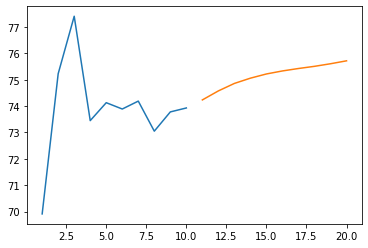

In [57]:
plt.plot(day_new,scaler.inverse_transform(data_oil[8206:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

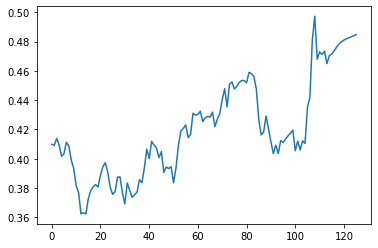

In [58]:
df3=data_oil.tolist()
df3.extend(lst_output)
plt.plot(df3[8100:])

In [59]:
df3=scaler.inverse_transform(df3).tolist()

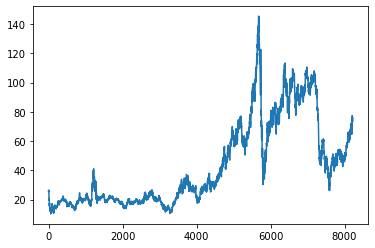

In [60]:
plt.plot(df3)

In [61]:
ls -1

crude_oil.h5
crude_oil.tgz


In [62]:
!pip install watson-machine-learning-client --upgrade


     |████████████████████████████████| 538 kB 24.1 MB/s eta 0:00:01


In [63]:
!pip install --upgrade "ibm-watson>=5.2.3"


     |████████████████████████████████| 413 kB 29.2 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 68 kB 16.5 MB/s eta 0:00:01
  Created wheel for ibm-watson: filename=ibm_watson-5.3.1-py3-none-any.whl size=409192 sha256=b3a329056b4e6b960cf41aae9af4e820266a517fe2b2c452f21ce34e79149582
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/75/6b/79/2448b483fff5fdbea4d69f69bddda57ba8446c019526ed5b48
Successfully built ibm-watson


In [65]:
from ibm_watson_machine_learning import APIClient
wml_credentials = { "url": "https://us-south.ml.cloud.ibm.com",
                  "apikey": "59VBsHIzN8nA4LJxHCKmWxQzXuvGU9FCdZdA6FBWGlty"
                  }

In [66]:
client=APIClient(wml_credentials)

In [67]:
def guide_from_space_name(client,space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources']if item['entity']["name"]== space_name)['metadata']['id'])

In [68]:
space_uid = guide_from_space_name(client,'models')
print("Space UID = " + space_uid)

Space UID = 80a00b32-6ba4-43ff-af65-2caac08f0e60


In [69]:
client.set.default_space(space_uid)

client.software_specifications.list()

software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_2.4-py3.7-horovod")


-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1-py3.9             12b83a17-24d8-5082-900f-0ab31fbfd3cb  base
scikit-learn_0.22-py3.6        154010f

In [70]:
software_spec_uid


'1092590a-307d-563d-9b62-4eb7d64b3f22'

In [71]:
!pip install watson-machine-learning-client


In [72]:
model_details = client.repository.store_model(model="crude_oil.tgz",
                                              meta_props= {
                                                  client.repository.ModelMetaNames.NAME:"models",
                                                  client.repository.ModelMetaNames.TYPE:"keras_2.2.4",
                                                  client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
                                              }) 
model_id = client.repository.get_model_uid(model_details)

Note: Warnings!! :  Model type keras_2.2.4 is deprecated. We recommend you use a supported model type. See Supported Frameworks https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/pm_service_supported_frameworks.html
This method is deprecated, please use get_model_id()


/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/ibm_watson_machine_learning/repository.py:1458: UserWarning: This method is deprecated, please use get_model_id()
  warn("This method is deprecated, please use get_model_id()")


In [73]:
model_id

'0481cf50-73e6-43f8-9ccf-8528ab63fd49'

In [74]:
ypred=model.predict(X_test)

In [75]:
ypred

array([[0.35360524],
       [0.35014442],
       [0.34702602],
       ...,
       [0.4665216 ],
       [0.471402  ],
       [0.46525568]], dtype=float32)

In [76]:
pwd

'/home/wsuser/work'

In [77]:
model = load_model('crude_oil.h5')